# Regressão Logística

data: 03/2020

# Resumo

Neste caderno o tema tratado sera sobre regressão logística. Será explicado todos os aspectos sobre esse modelo e será implementado um algoritmo para esse modelo, utilizando-se de gradiende descendente. Assim testaremos e tentaremos visualizar suas aplicações e discutiremos alguns resultados.



# Sumário
 
 <ol>
<li>Introdução</li>
<li>Medidas de Erro</li>
<li>Gradiente Descendente</li>
<li>Algoritmo de Regressão Logística</li>
<li>Visualização</li>
<li>Teste</li>
<li>Bibliografia</li>
</ol>


## 1. Introdução
A regressão logística é outro modelo linear que trata também do problema de classificação. Contudo, diferente dos outros modelos estudados até o presente momento, ele não trata da decisão de classificar um dado de uma maneira binária. Ou seja, ao invés de produzir uma saída +-1 para um determinado dado, ele retorna uma probabilidade ou seja, um valor entre 0 e 1. Esse modelo é extremamente útil em momentos que uma resposta binária é insuficiente para lidar de uma maneira satisfatória com o problema.

O modelo é montado para que sua saída possa ser interpretada como uma probabilidade, ou seja, signifique o quão provável é de determinado dado ter uma classificação. Por exemplo, se para o nosso conjunto de dados $ x, y $ os vetores $ x_n $ conterem os valores de pressão arterial, nível de colesterol, peso, idade e outros fatores de um conjunto grande de pacientes, e o valor de $ y_n $ dizer se esses pacientes sofreram um infarto ou não(ou seja, for 1 se esses pacientes sofreram um infarto, e -1 se não sofreram). Ao aplicarmos o modelo para um novo paciente baseado nesses dados, a saída a probabilidade de que ele venha a sofrer um infarto.

Para que a saída do modelo possa ser interpretada como uma probabilidade, precisamos restringí-la a um número entre 0 e 1. Uma maneira eficiente de fazê-lo seria se basear nos modelos lineares anteriores e adaptar o valor de saída para esse intervalo.

No modelo de regressão linear, nós calculavamos $ h(x) = w^Tx $ que dava como resultado um valor real. Para adaptarmos essa ideia utilizaremos de apoio a função sigmóide $\theta (s) =  \frac{e^s}{1 + e^s} $, que para qualquer $s$ real, retorna um valor entre 0 e 1 segundo o gráfico a seguir:

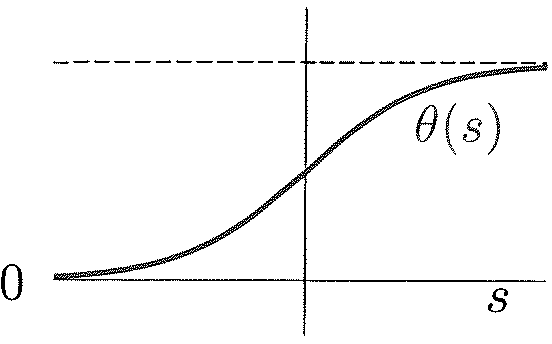

Pelo gráfico é visível que quanto menor o $ s $ mais ele se aproxima de 0, e quanto maior o $ s $, mais ele se aproxima de 1, contudo, ele só assumiria esses valores em $ \pm \infty $.

A ideia do modelo é então, aplicar essa função sigmóide para o número real $ w^Tx $, fazendo que ela retorne um valor probabilístico, a função $ h(x) $ para a regressão logística fica então $ h(x) = \theta (w^Tx) $.

Para esse modelo de aprendizado, nossa função alvo se comportará como uma distribuição de probabilidade $ f(x) = P(y|x) $.

## 2. Medidas de Erro

A medida de erro ponto a ponto que é utilizada na regressão logística é a ideia de: Quão provável é que nós acertemos a saída y de uma entrada $ x $ se nosso $ h(x) $ fosse igual a distribuição alvo $ P(y|x)$ ?
Segundo as propriedades da função sigmóide que utilizamos, é facil verificar que $P(y|x) = \theta(y \textbf{w}^Tx) $.
Como os dados $ (x_1, y_1), (x_2,y_2),..., (x_n,y_n) $ são independentes entre si, a probabilidade de de encontrar todos os  $y_n$'s para os $x_n$'s correspondentes é o produto:
$\prod \limits_{n = 1} ^{N} P(y_n|x_n) $.

O método é então, encontrar os valores que maximizam essa probabilidade. Esse problema é equivalente a minimizar uma função mais simples de lidar:

$ \frac{-1}{N} ln(\prod \limits_{n = 1} ^{N} P(y_n|x_n))  =  \frac{1}{N} \sum \limits_{n = 1} ^{N} ln(\frac{1}{P(y_n|x_n)}) $

Substituindo $ P(y_n|x_n) $ na fórmula temos que estamos minimizando :

$ \frac{1}{N} \sum \limits_{n = 1} ^{N} ln(\frac{1}{\theta(y \textbf{w}^Tx)}) $

em termos de $ w $. Como o nosso objetivo é minimizar essa quantidade, podemos interpretá-la como uma "medida de erro". Ao substituir a função sigmóide, chegamos na expressão do erro de entrada da Regressão Logística.

$ E_{in}(\textbf{w}) = \frac {1}{N} \sum \limits_{n = 1} ^{N} ln(1 + e^{-y_n \textbf{w}^T x_n} )$.

Seguindo uma abordagem já utilizada nos outros modelos lineares, tentaremos fazer o aprendizado de uma forma que o $ E_{in} $ seja o mínimo.

Na regressão linear, foi possível obter uma fórmula analítica para que $ E_{in}$ fosse o mínimo, utilizando $ \nabla E_{in} = 0 $. Contudo, para regressão logística, a forma analítica não é possível de ser solucionada. Sendo assim, a abordagem que utilizaremos para esse modelo será uma maneira de chegarmos em um valor próximo de $ \nabla E_{in} = 0 $.


## 3. Gradiente Descendente

Gradiente descendente é uma técnica de minimizar uma função duplamente diferenciável, como por exemplo $ E_{in}(\textbf{w})$. É um método em que começamos com um $ \textbf{w}(0)$ e vamos iterativamente atualizando seu valor na direção e sentido que faça com que diminua seu $ E_{in} $, até chegar em um ponto em que ele é mínimo. Uma dificuldade que encontramos com o gradiente descendente, é que esse $w $ encontrado após $ n $ iterações leva a um *mínimo local*, e não necessáriamente ao mínimo global da função.
Essa ferramenta é extremamente útil em problemas de aprendizado de máquina, já que ela é uma maneira iterativa que tende a levar a medida de erro a um mínimo.

Um exemplo do gradiente descendente aplicado a uma superfície (considerando a dimensão de $ \textbf{w} = 1 $) se encontra na figura a seguir: 

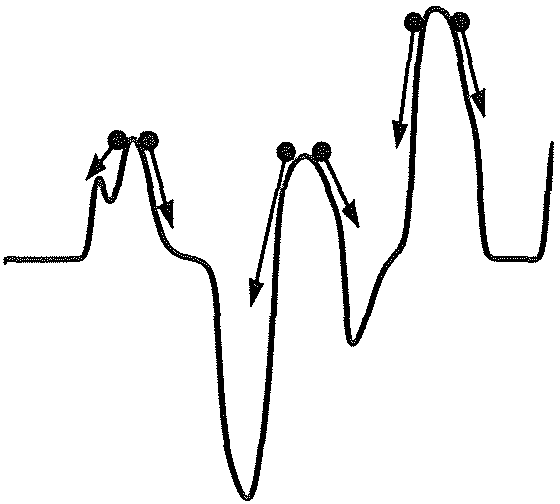

Podemos ver então, o quão a ferramenta do gradiente descendente é potente, já que consegue encontrar mínimos de erro de uma maneira muito eficiente, e também o quanto ela pode ser limitada para alguns casos, já que ela pode encontrar um mínimo que não seja bom para a resolução do problema.

### 3.1 Formulação matemática

No gradiente descendente, atualizamos o vetor $ \textbf{w} $ a cada iteração na direção do vetor que diminui seu $ E_{in} $. Definindo o vetor $ \hat{\textbf{v}} $ como essa direção e sentido, podemos calculá-lo:


$ \hat{\textbf{v}}  = - \frac{\nabla E_{in}(\textbf{w}(0))}{||\nabla E_{in}(\textbf{w}(0))||} $

E a atualização ocorre seguindo:

$ \textbf{w}(n) = \textbf{w}(n-1) + \eta \hat{\textbf{v}}$

sendo $ \eta$ um fator de atualização.


### 3.2 Gradiente Descendente aplicado a Regressão Logística

A vantagem de aplicar esse método à Regressão Logística é que a função $ E_{in}(\textbf{w}) $ é convexa, ou seja, tem apenas um ponto de otimização, no caso de mínimo. Isso significa da prática que independente do $ \textbf{w}(0) $, ao aplicarmos o gradiente descendente sempre encontraremos o mínimo global da função.

Para regressão logística descobrimos $ \hat{\textbf{v}} $ por:

$ \nabla E_{in}(\textbf {w}) = - \frac {1}{N} \sum \limits_{n = 1}^{N} \frac{y_n \textbf{x}_n}{1 + e^{y_n \textbf{w}^T \textbf{x}_n}} $.

Sendo assim, o algoritmo de regressão linear utilizando-se gradiente descendente é: inicializar com um $ \textbf{w}(0) $ aleatório e atualizá-lo na direção contrária de $ \hat{\textbf{v}} $ a cada iteração até que seja a hora de parar.

Para o algoritmo que será implementado, nós inicializaremos o vetor $ \textbf{w} $ com valores aleatórios, seguindo uma distribuição normal com média zero e variância baixa. O algoritmo terminará de rodar se a norma do vetor gradiente do erro for menor que um número pré estipulado, ou se o laço passar de um número de iterações limite.



## 4.Algoritmo de Regressão Logística

In [59]:
from random import seed
from random import gauss
import numpy as np 
import math as mt

def tetha(s):
    return mt.exp(s)/(1 + mt.exp(s))

def logistic(x, y):
    #Inicializar
    t = 0
    seed(1)
    k = 0.1
    n = x.ndim # ve a dimensão do vetor X
    if (n == 1):
        m = len(x)
        p = 1
        x = x.reshape((len(x), 1))
    else:
        m, p = np.shape(x)
    ones = np.ones((len(x), 1))
    x = np.append(ones, x, axis = 1)
    w = np.ones(p + 1)
    for i in range(len(w)):
        w[i] = gauss(0, 0.5)
    while (True):
        t += 1
        soma = np.zeros(len(w))
        for i in range(m):
            s = y[i] * w.dot(x[i,:])
            soma = soma + (y[i]*x[i,:])/(1 + mt.exp(s) )
            #print(soma)
        vt = (1/len(y))*soma
        w += k*vt
        if (abs(np.linalg.norm(vt)) <= 10e-2 or t >= 10000):
            break
    return w
    
def prob(x, w):
    return tetha(w.dot(x))
    

## 5.Visualização

 A probabilidade do ponto (8, 7) ser amarelo é:  0.9318706364428564
 A probabilidade do ponto (-1, -1) ser amarelo é:  0.34098897266797457


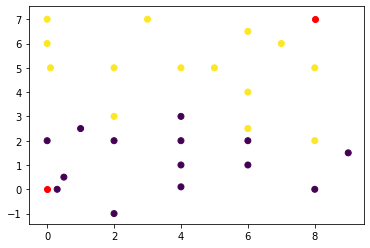

In [60]:
import matplotlib.pyplot as plt

def esbocar(x, y):
    pbx = np.max(x[:,0])
    pby = np.max(x[:,1])
    psx = np.min(x[:,0])
    psy = np.min(x[:,1])
    #plt.figure(i)
    plt.scatter(x[:,0],x[:,1],c=y)



x = np.array([[1, 2.5], 
               [0.5, 0.5], 
               [2, 2], 
               [4, 0.1], 
               [0.1, 5] , 
               [6,4], 
               [8,2], 
               [6,2], 
               [5, 5], 
               [3, 7], 
               [7, 6], 
               [8, 5], 
               [4, 3], 
               [6, 2.5],
               [2, 3],
               [9, 1.5],
               [6, 1],
              
               [2,5], 
               [0,6], 
               [0, 7], 
               [4, 5], 
               [6, 6.5], 
               [0.3, 0], 
               [8, 0], 
               [4, 1],
               [2, -1],
               [4, 2],
               [0, 2],
             ])
y = [-1 , -1, -1, -1 , 1 , 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1]

xteste = np.array([[8, 7],
                   [0, 0]])

w = logistic(x, y)

esbocar(x, y)

plt.scatter(xteste[:,0], xteste[:,1], c= 'red')

ones = np.ones((len(xteste), 1))
xteste = np.append(ones, xteste, axis = 1)

print (" A probabilidade do ponto (8, 7) ser amarelo é: ", prob(xteste[0,:], w))
print (" A probabilidade do ponto (-1, -1) ser amarelo é: ", prob(xteste[1,:], w))

## 6.Teste

Com os dados (pontos amarelos e azuis) utilizamos o algoritmo para descobrir o valor do vetor $ \textbf{w}(0) $. E com ele, nosso objetivo foi descobrir a probabilidade desses dois pontos vermelhos $(8, 7)$ e $(0,0)$ serem pontos amarelos.
Utilizando-se da previsão acima, chegamos em:

Probabilidade de $(8, 7) $ ser amarelo: 93 %

Probabilidade de $(0, 0) $ ser amarelo: 34 %

Visualizando o gráfico acima, é possível perceber que o ponto $ (8, 7) $ está bem acima da maioria dos amarelos, e, seguindo um modelo linear, é muito provável que seja amarelo também. Segundo essa lógica, o ponto  $ (0, 0) $ está entre os azuis, então é bem menos provável que seja amarelo.

Esse teste mostra a versátilidade do modelo, já que diferente dos outros modelos de classificação, ele não nos mostra uma decisão binária (é ou não amarelo), mas sim retorna a um número real que pode ser interpretado como a probabilidade de determinada decisão binária ser "prudente", o que é extremamente útil para diversas aplicações.

## 7. Bibliografia e Sites


[1] Learning From Data - Yaser S. Abu Mustafa

[2] https://work.caltech.edu/lectures.html

[3] http://cs231n.github.io/python-numpy-tutorial/

[4] https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

[5] https://www.statisticssolutions.com/what-is-logistic-regression/

